In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
import logging
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
summary_handler = logging.FileHandler('./summary.log')
summary_handler.setLevel(logging.DEBUG)
summary_handler.setFormatter(formatter)
handler = logging.FileHandler('./logging.log')
handler.setLevel(logging.NOTSET)
handler.setFormatter(formatter)

logger = logging.getLogger()
logger.setLevel(logging.NOTSET)
logger.addHandler(handler)

In [3]:
import numpy as np 
from matplotlib import pyplot as plt

In [4]:
X =np.array([[ 0.72294659, -1.00386432],
            [-0.60553577,  2.29966755],
            [-2.50699176, -1.03101898],
            [ 2.63961761,  2.21632328]])
y = np.array([0,0,1,1])

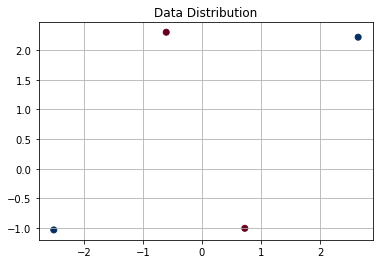

In [5]:
from classifiers.visualization import Plot_Data
Plot_Data(X, y).plot()

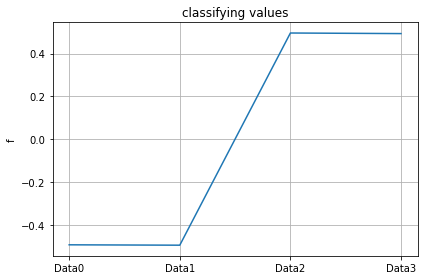

In [6]:
from classifiers.convex.svm import BinarySVM
from classifiers.kernel import Kernel

svm = BinarySVM(Kernel('SingleQubit'), mutation='REDUCED_QASVM', C = None, k=0.1)
logging.getLogger(svm.__module__).addHandler(summary_handler)
svm.fit(X, y)
plt.plot(svm.f(X))
plt.grid()
plt.xticks(range(4), [f'Data{i}' for i in range(4)])
plt.ylabel('f')
plt.title('classifying values')
plt.tight_layout()

# Now, let's run simulation

In [7]:
from classifiers.quantum.qasvm import QASVM
from classifiers.quantum import Qasvm_Mapping_4x2
from classifiers.visualization import Plot_Log_From_SPSA
from classifiers.utils import get_loggers_add_handle
from classifiers.optimizer import MySPSA, SimplePMStorage
from qiskit.aqua.quantum_instance import QuantumInstance
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.ignis.mitigation import CompleteMeasFitter
from qiskit.aqua.algorithms.vq_algorithm import VQAlgorithm
from qiskit import IBMQ

In [8]:

# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q-kaist', group='internal', project='default')
# backend = QasmSimulator.from_backend(provider.get_backend('ibmq_sydney'))
import dill
with open('/home/quic/QUIC-Projects/20210314_ibmq-sydney.dill', 'rb') as f:
    backend = dill.load(f)

In [9]:
# import dill
# with open('/home/quic/QUIC-Projects/20210314_ibmq-sydney.dill', 'wb') as f:
#    dill.dump(backend, f)
# backend

In [10]:
quantum_instance = QuantumInstance(backend=backend, shots=2**13, optimization_level=3, seed_transpiler=0, measurement_error_mitigation_cls=CompleteMeasFitter, initial_layout=Qasvm_Mapping_4x2(backend).layout)
# quantum_instance = QuantumInstance(backend=QasmSimulator(), shots=2**13)
storage = SimplePMStorage()
optimizer = MySPSA(maxiter=2**13, last_avg=2**10, callback=storage)
var_form = RealAmplitudes(2, reps=1, entanglement=[[0,1],[0,1]], skip_final_rotation_layer=True)
#var_form = RealAmplitudes(2, reps=5)
qasvm = QASVM(X, y, var_form=var_form, optimizer=optimizer, quantum_instance=quantum_instance, C=None, k=0.1).dual
qc = qasvm.second_order_circuit[0]
print(qc.depth())
qc.draw(idle_wires=False, fold=-1)

81


global phase: -1.4305
            ┌──────────────┐  ┌───────────┐                                                    ┌──────────────────┐       ┌────────────────┐      ┌─────────────────┐                            ┌───┐                                                           ┌───┐                                                                                                                                                                                                                                                                                                                                               ┌───┐                                                                                                                                                                                                                                                                                                                                                                                                              ░          
 i_0 -> 0 ──┤ U3(θ[0],0,0) ├──┤ U3(π,0,0) ├───────────────────────────────────────■────────────┤ U3(π/2,-π/2,π/2) ├──■────┤ U3(π/2,π,-π/2) ├───■──┤ U3(π,-π/4,3π/4) ├────────────────■───────────┤ X ├──────────■───────────────────────────■────────────────────┤ X ├────────────■───────────────────────────────────────────────────────────────────────────────────────────────────────■──────────────────────────────────────────────────────────────────────────────────────────────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────■─────────┤ X ├──■──────────────────────────────────────────────────────────────────────────────────────────────■────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────────
          ┌─┴──────────────┴─┐└───────────┘┌───┐     ┌────────────────┐         ┌─┴─┐          └─┬─────────────┬──┘┌─┴─┐  ├────────────────┤ ┌─┴─┐└┬────────────────┤              ┌─┴─┐         └─┬─┘        ┌─┴─┐                       ┌─┴─┐                  └─┬─┘          ┌─┴─┐┌────────────────────┐                          ┌────────────────┐      ┌─────────────────────────┐┌─┴─┐┌────┐┌──────────────────────┐┌───┐        ┌────┐       ┌────────────────────────┐            ┌─┴─┐             ┌────┐┌────────────────────┐     ┌────────────────┐          ┌─────────────┐                ┌─┴─┐       └─┬─┘┌─┴─┐     ┌────────────────────┐          ┌────────────────┐     ┌───────────────────────┐     ┌─┴─┐     ┌───────────────┐                    ┌───┐┌──────────────┐                                                                                                                                                                                                                                           ░    ┌─┐   
yi_0 -> 1 ┤ U3(π/2,-π/2,π/2) ├──────■──────┤ X ├──■──┤ U3(π,π/2,-π/2) ├─────────┤ X ├────────────┤ U3(π/2,0,π) ├───┤ X ├──┤ U3(π/2,-π,π/2) ├─┤ X ├─┤ U3(π/2,-π,π/2) ├──■───────────┤ X ├───────────■──────────┤ X ├───────────■───────────┤ X ├────────────────────■────────────┤ X ├┤ U3(π/2,-π/2,-3π/2) ├────────────■─────────────┤ U3(π/2,0,3π/2) ├──■───┤ U3(3.1378,-6.195e-14,π) ├┤ X ├┤ √X ├┤ U3(π/2,-4.0921,-π/2) ├┤ X ├────────┤ √X ├───────┤ U3(π/2,-0.066922,-π/2) ├────────────┤ X ├─────────────┤ √X ├┤ U3(3.1275,-π/2,-π) ├──■──┤ U3(π/2,0,3π/2) ├──■───────┤ U3(π/2,π,π) ├───────■────────┤ X ├─────────■──┤ X ├──■──┤ U3(π/2,-π/2,-3π/2) ├───────■──┤ U3(π/2,0,3π/2) ├──■──┤ U3(π,-0.86246,2.2791) ├─────┤ X ├─────┤ U3(0,0,-5π/2) ├────────────────────┤ X ├┤ U3(π/2,π,-π) ├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [11]:
logging.getLogger(qasvm.__module__).addHandler(summary_handler)
logging.getLogger(qasvm.optimizer.__module__).addHandler(summary_handler)
logging.getLogger(qasvm.circuit_class.__module__).addHandler(summary_handler)

qasvm.run()

{'optimizer_evals': None,
 'optimizer_time': 6458.579580545425,
 'optimal_value': -0.0041903144572541795,
 'optimal_point': array([-3.82798559,  4.66647745]),
 'optimal_parameters': {Parameter(θ[0]): -3.827985593852652,
  Parameter(θ[1]): 4.666477451039047}}

In [12]:
import pathlib
import time
import uuid
prefix = time.strftime('%y%m%d-%H%M%S-', time.localtime(time.time()))+str(uuid.uuid4())
qasvm.save(pathlib.Path.home()/'QUIC-Projects'/'saved_model (.pkl)'/(prefix+'_qasvm.pkl'))
svm.save(pathlib.Path.home()/'QUIC-Projects'/'saved_model (.pkl)'/(prefix+'_svm.pkl'))
storage.save(pathlib.Path.home()/'QUIC-Projects'/'saved_model (.pkl)'/(prefix+'_storage.pkl'))

# End Session

In [13]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [14]:
import numpy as np 
from matplotlib import pyplot as plt

In [15]:
from classifiers.utils import load_from_log
svm = load_from_log('./logging.log', 'BinarySVM')
qasvm = load_from_log('./logging.log', 'QASVM')
storage = load_from_log('./logging.log', 'SimplePMStorage')
# print(repr(svm), repr(qasvm), repr(storage.__dict__))

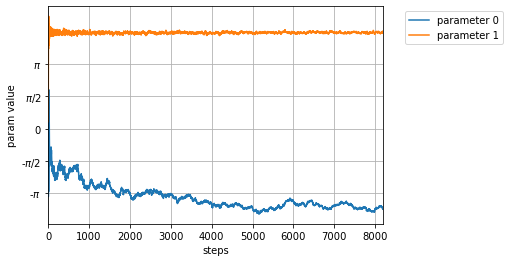

In [16]:
params = np.array(list(storage.params.values()))
steps = np.array(list(storage.params.keys()))
[plt.plot(steps, params[:,i], label=f'parameter {i}') for i in range(len(qasvm._var_form_params))]
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([min(steps), max(steps)])
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['-$\pi$', '-$\pi/2$', '$0$', '$\pi/2$', '$\pi$'])
plt.xlabel('steps')
plt.ylabel('param value')
plt.grid()

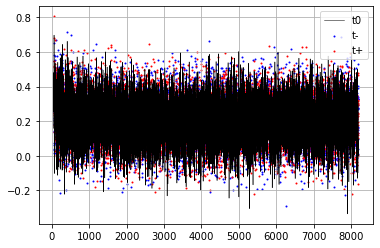

In [17]:
cost_pm = np.array(list(storage.costs_pm.values()))
cost = np.array(list(storage.costs.values()))
plt.scatter(steps[50:], cost_pm[50:][:,0], label='t-', c='b', s=1)
plt.scatter(steps[50:], cost_pm[50:][:,1], label='t+', c='r', s=1)
plt.plot(steps[50:], cost[50:], label='t0', c='k', linewidth=0.5)
plt.grid()
plt.legend()

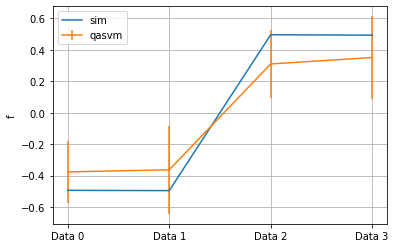

In [18]:
plt.plot(svm.f(svm.data), label='sim')
res = np.array([qasvm.f(qasvm.data) for _ in range(10)])
plt.errorbar(range(len(res.mean(axis=0))), res.mean(axis=0), yerr=2*res.std(axis=0), label='qasvm')
plt.xticks(range(4), [f'Data {i}' for i in range(4)])
plt.ylabel('f')
plt.legend()
plt.grid()